In [1]:
# Adding relative path for imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import numpy as np
import _titanic

importer les donnees du titanic et afficher les 5 premieres lignes

In [3]:
train = pd.read_csv('../_data/titanic_train.csv')
train.head().tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


faire l'inventaire des colonnes du dataframe en precisant les colonnes quantitatives et les qualitatives

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dead = train[train['Survived']==0]
survived = train[train['Survived']==1]

identifier les valeurs manquantes et imputer les par le mode pour les variables qualitatives et la mediane pour les varialbes quantitatives

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

considerer les variables ['SibSp', 'Parch', 'Fare'] et mettre en place un modèle de regression logistique

In [7]:
cols_name=['Survived','Pclass']
train = _titanic.convert_int_to_object(train, cols_name)

train.isnull().sum()

creer la target qui est represente par la colonne survived
combien de personnes ont survecu
combien de femmes ont embarqué et combien ont survecu?

In [8]:
train['Title'] = train['Name'].apply(lambda x : _titanic.getTitle(x))
train['Surname'] = train['Name'].apply(lambda x : '(' in x)

In [9]:
a = _titanic.input_missing_values(train)

In [10]:
train.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
Surname        0
dtype: int64

### quick modelisation: logistics Regression 



In [11]:
model_cols1 =['SibSp', 'Parch', 'Pclass']
X, y = _titanic.parse_model(X=train.copy(), use_columns=model_cols1)

##### Note: For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.

In [12]:
_titanic.logreg_prediction(X,y, 0.3, 42)

              precision    recall  f1-score   support

           0       0.71      0.83      0.76       157
           1       0.68      0.52      0.59       111

    accuracy                           0.70       268
   macro avg       0.70      0.68      0.68       268
weighted avg       0.70      0.70      0.69       268

score :  0.7014925373134329


E:\Users\Mimyke\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
train['Surname'] = train['Name'].apply(lambda x : '(' in x)
mask = train['Surname']==True
train.loc[mask, ["Name", "Surname"]]

,Name,Surname
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",True
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",True
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",True
9,"Nasser, Mrs. Nicholas (Adele Achem)",True
15,"Hewlett, Mrs. (Mary D Kingcome)",True
...,...,...
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",True
874,"Abelson, Mrs. Samuel (Hannah Wizosky)",True
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",True
880,"Shelley, Mrs. William (Imanita Parrish Hall)",True


### Etude des variables

In [14]:
_titanic.style.use('fivethirtyeight')
%matplotlib inline
%pylab inline


Populating the interactive namespace from numpy and matplotlib


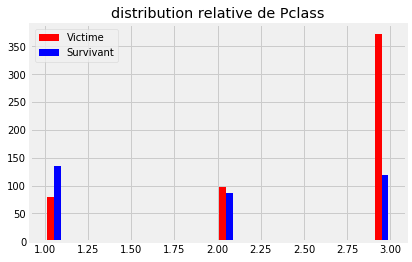

In [15]:
_titanic.plot_hist('Pclass', dead, survived)

In [16]:
to_dummify = ["Pclass"]
X_dummy, dummy_columns, dummy_encoder = _titanic.dummify_features(train[to_dummify])
X_dummy = pd.DataFrame(X_dummy.toarray(), columns=dummy_columns)

E:\Users\Mimyke\Anaconda\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
E:\Users\Mimyke\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [17]:
train = train.join(X_dummy,lsuffix='_caller', rsuffix='_other')

In [18]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,Mr,False,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,True,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Miss,False,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,True,1.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,Mr,False,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,Rev,False,0.0,1.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,False,1.0,0.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S,Miss,False,0.0,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,False,1.0,0.0,0.0


In [19]:
train.loc[(train.Sex == "male", "Sex")]=1
train.loc[(train.Sex == "female", "Sex")]=0 #On remplace le sexe par un bool

In [20]:
train["Agebin"] = pd.cut(train["Age"],bins=[0,8,60,85], labels=[1,2,3]) #classes d'age
 
train['Agebin'].unique()

[2, 1, 3]
Categories (3, int64): [1 < 2 < 3]

In [21]:
model_cols2 =['SibSp', 'Parch', 'Fare', 'Pclass','Sex','Agebin']
X2, y2 = _titanic.parse_model(X=train.copy(), use_columns=model_cols2)


In [22]:
_titanic.logreg_prediction(X2,y2, 0.3, 42)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       157
           1       0.79      0.69      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

score :  0.7947761194029851


E:\Users\Mimyke\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [24]:
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.318182
5,the Countess,1.000000


In [25]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train['Title'] = train['Title'].map(title_mapping)
train['Title'] = train['Title'].fillna(0)

In [26]:
model_cols2 =['SibSp', 'Parch', 'Fare', 'Pclass','Sex','Agebin','Title']
X2, y2 = _titanic.parse_model(X=train.copy(), use_columns=model_cols2)


In [27]:
_titanic.logreg_prediction(X2,y2, 0.3, 42)

E:\Users\Mimyke\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.82      0.84      0.83       157
           1       0.77      0.75      0.76       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.80      0.80      0.80       268

score :  0.8022388059701493


In [35]:
rf_score = _titanic.randforest_prediction(X2,y2,0.3,42,300,20)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       157
           1       0.82      0.77      0.79       111

    accuracy                           0.83       268
   macro avg       0.83      0.82      0.83       268
weighted avg       0.83      0.83      0.83       268

score :  0.832089552238806


In [29]:
acc_random_forest = round(rf_score * 100, 2)
acc_random_forest

83.96

In [30]:
print(X2.columns)

Index(['SibSp', 'Parch', 'Fare', 'Pclass', 'Sex', 'Agebin', 'Title'], dtype='object')


In [34]:
_titanic.gridsearchCV_prediction(X2,y2,0.3,64)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:    7.2s


Parameters chosen:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       165
           1       0.84      0.71      0.77       103

    accuracy                           0.84       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.84      0.83       268

score:  0.835820895522388


[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   18.7s finished
